### Simple geometry example

How to use cellLocations and faceLocations functiosn to define cell and face values, variable in space

 Written by Ali A. Eftekhari
 Last checked: June 2021
 
 Ported to python by Gavin M. Weir June, 2023


In [1]:
# Enable interactive plotting
%matplotlib notebook   

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyfvtool.mesh import createMesh2D
from pyfvtool.cell import cellLocations, createCellVariable
from pyfvtool.face import faceLocations, createFaceVariable
from pyfvtool.visualization import visualizeCells

In [3]:
# Cell Variable:
# m = createMesh2D(Nx=int(30), Ny=int(20), Lx=float(5.0), Ly=float(3.0))
m = createMesh2D(int(30), int(20), float(5.0), float(3.0))

print(m.dimension)
print(m.dims)

2
[30 20]


In [4]:
X, Y, Z = cellLocations(m)

print(X.domain.dimension)
print((X.domain.dims, Y.domain.dims, Z.domain.dims))
print((X.value.shape, Y.value.shape, Z.value.shape))

2
(array([30, 20]), array([30, 20]), array([30, 20]))
((32, 22), (32, 22), (32, 22))


In [5]:
c = createCellVariable(m, np.sin(X.value[1:-1, 1:-1])*np.cos(Y.value[1:-1, 1:-1]))


<IPython.core.display.Javascript object>


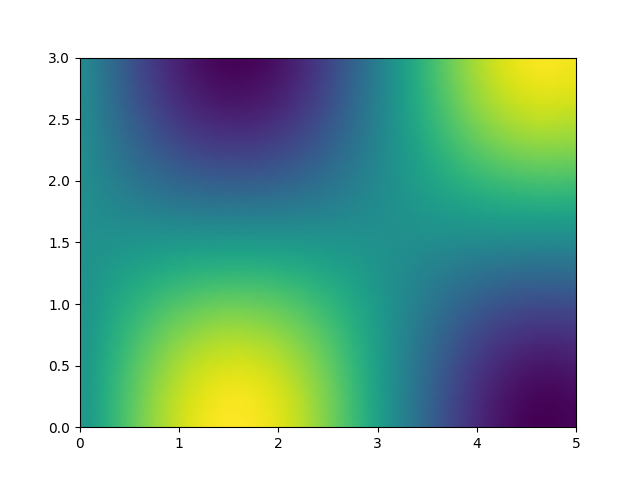

In [6]:
plt.figure()
visualizeCells(c)

In [7]:
# Face variable:
Xf, Yf, Zf = faceLocations(m)


In [8]:
v = createFaceVariable(m, 0)
v.xvalue = np.sin(Xf.xvalue)*Xf.yvalue
v.yvalue = np.cos(Yf.xvalue)*np.sin(Yf.yvalue)

<IPython.core.display.Javascript object>


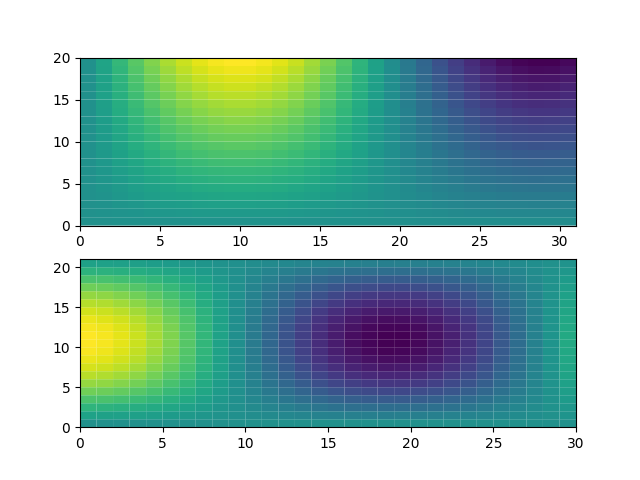

In [9]:
hfig, (ax1, ax2) = plt.subplots(2, 1)

ax1.pcolor(v.xvalue.T, edgecolors=None)
ax2.pcolor(v.yvalue.T, edgecolors=None)
